In [1]:
import numpy as np
import matplotlib.pyplot as plt

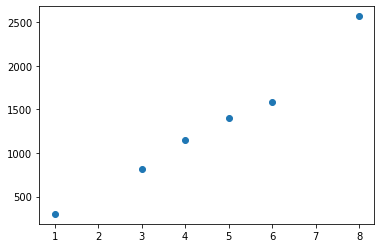

In [2]:
x = np.array([[1],
              [4],
              [3],
              [8],
              [6],
              [5]])
y = np.array([300,1150,820,2570,1590,1400])
plt.scatter(x,y)
plt.show()

In [3]:
class LinearRegression():
  def __init__(self):
    pass

  def fit(self,x,y,lr=0.01,max_step=500):
    self.weights = np.zeros(x.shape[1])
    self.bias = 0.0
    loss = 0.0
    f = x.shape[0]
    step = 0
    for i in range(max_step):
      step += 1
      y_preds = np.matmul(x,self.weights) + self.bias
      loss = np.sum([((y[count]-y_pred)**2) for count,y_pred in enumerate(y_preds)])
      bias_derivative = np.sum([((-2)*(y[count]-y_pred)) for count,y_pred in enumerate(y_preds)])
      weight_derivatives = np.zeros(self.weights.shape[0])
      for counter,weight in enumerate(self.weights):
        weight_derivatives[counter] = np.sum([((-2)*(y[count]-y_pred)*x[count,counter]) for count,y_pred in enumerate(y_preds)])
      self.bias = self.bias - (lr*bias_derivative)
      self.weights = self.weights - (lr*weight_derivatives)
    print('Loss = ',loss)
    print('pelatihan selesai pada step ke-',step)
    
  def predict(self,x):
    return (np.matmul(x,self.weights)+self.bias)      

In [4]:
def MinMaxScaler(x):
  if (x.ndim == 1):
    return [((i-np.min(x))/(np.max(x)-np.min(x))) for i in x]
  elif (x.ndim > 1):
    res = np.zeros((x.shape[0],x.shape[1]))
    for column in range(x.shape[1]):
      for row in range(x.shape[0]):
        res[row,column] = (x[row,column]-np.min(x[:,column]))/(np.max(x[:,column])-np.min(x[:,column]))
    return res 


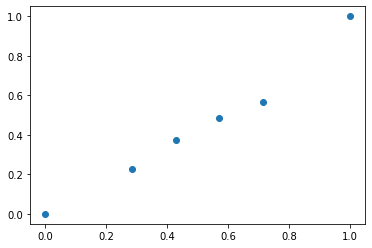

In [5]:
x = MinMaxScaler(x)
y = MinMaxScaler(y)
plt.scatter(x,y)
plt.show()

In [6]:
model = LinearRegression()
model.fit(x,y,max_step=2000,lr=0.01)

Loss =  0.014551621581528408
pelatihan selesai pada step ke- 2000


In [7]:
print(model.bias)
print(model.weights)

-0.03942357723686706
[0.96430971]


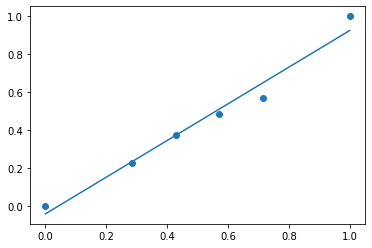

In [8]:
plt.scatter(x,y)
x_plot = np.array([[0.],[1.]])
y_plot = np.array(model.predict(x_plot))
plt.plot(x_plot,y_plot)